In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/WhatsgoodlyData-6.csv")

In [ ]:
# Check for duplicates
duplicates = data[data.duplicated()]
print("Duplicates:", duplicates)

Duplicates: Empty DataFrame
Columns: [index, Question, Segment Type, Segment Description, Answer, Count, Percentage]
Index: []


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:", missing_values)

Missing Values: index                  0
Question               0
Segment Type           0
Segment Description    0
Answer                 0
Count                  0
Percentage             0
dtype: int64


In [ ]:
# Check data types
print("Data Types:")
print(data.dtypes)

Data Types:
index                    int64
Question                object
Segment Type            object
Segment Description     object
Answer                  object
Count                    int64
Percentage             float64
dtype: object


In [ ]:
# Check for unique values
print("\nNumber of Unique Values in Each Column:")
print(data.nunique())


Number of Unique Values in Each Column:
index                  1450
Question                  1
Segment Type              5
Segment Description     289
Answer                    5
Count                   202
Percentage              334
dtype: int64


In [ ]:
# Summary statistics to identify outliers
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
             index        Count   Percentage
count  1450.000000  1450.000000  1450.000000
mean    724.500000    35.013793     0.199313
std     418.723258    95.055604     0.274989
min       0.000000     0.000000     0.000000
25%     362.250000     0.000000     0.000000
50%     724.500000     1.000000     0.063500
75%    1086.750000    20.000000     0.323750
max    1449.000000   947.000000     1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Select the categorical columns to one-hot encode
categorical_columns = ["Question", "Segment Type", "Segment Description", "Answer"]

# Use pandas' get_dummies function to perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Select the numerical columns to normalize or scale
numerical_columns = ["Count", "Percentage"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected numerical columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])


# Save the encoded dataset to a new CSV file
data_encoded.to_csv("encoded_dataset.csv", index=False)

In [ ]:
df = pd.read_csv("/content/encoded_dataset.csv")
df

index     Count  Percentage  \
0         0  0.578669       0.205   
1         1  0.967265       0.342   
2         2  0.090813       0.032   
3         3  0.189018       0.067   
4         4  1.000000       0.354   
...     ...       ...         ...   
1445   1445  0.227033       0.180   
1446   1446  0.373812       0.297   
1447   1447  0.046463       0.037   
1448   1448  0.092925       0.074   
1449   1449  0.519535       0.412   

      Question_What social platform has influenced your online shopping most?  \
0                                                     1                         
1                                                     1                         
2                                                     1                         
3                                                     1                         
4                                                     1                         
...                                                 ...                         
1445                                                  1                         
1446                                                  1                         
1447                                                  1                         
1448                                                  1                         
1449                                                  1                         

      Segment Type_Custom  Segment Type_Gender  Segment Type_Mobile  \
0                       0                    0                    1   
1                       0                    0                    1   
2                       0                    0                    1   
3                       0                    0                    1   
4                       0                    0                    1   
...                   ...                  ...                  ...   
1445                    1                    0                    0   
1446                    1                    0                    0   
1447                    1                    0                    0   
1448                    1                    0                    0   
1449                    1                    0                    0   

      Segment Type_University  Segment Type_Web  \
0                           0                 0   
1                           0                 0   
2                           0                 0   
3                           0                 0   
4                           0                 0   
...                       ...               ...   
1445                        0                 0   
1446                        0                 0   
1447                        0                 0   
1448                        0                 0   
1449                        0                 0   

      Segment Description_Appalachian State University  ...  \
0                                                    0  ...   
1                                                    0  ...   
2                                                    0  ...   
3                                                    0  ...   
4                                                    0  ...   
...                                                ...  ...   
1445                                                 0  ...   
1446                                                 0  ...   
1447                                                 0  ...   
1448                                                 0  ...   
1449                                                 0  ...   

      Segment Description_your zodiac sign? Pisces (Feb 19 - Mar 20)  \
0                                                     0                
1                                                     0                
2                                                     0                
3                                                     0                
4    

In [ ]:
EDA ( Exploratory Data Analysis )

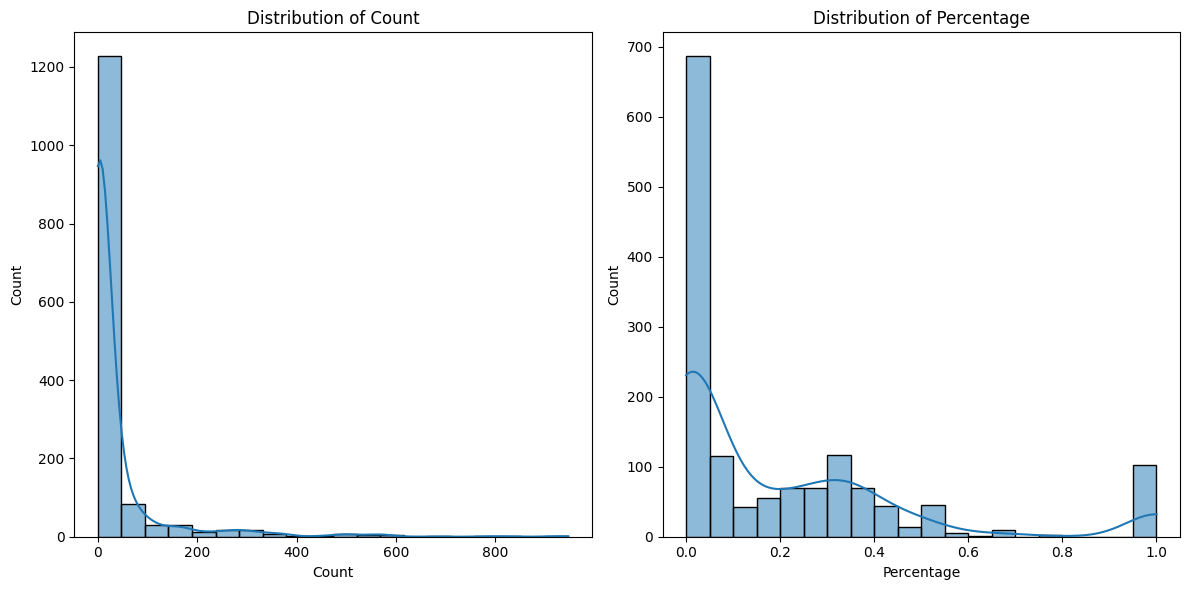

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data["Count"], bins=20, kde=True)
plt.title("Distribution of Count")

plt.subplot(1, 2, 2)
sns.histplot(data["Percentage"], bins=20, kde=True)
plt.title("Distribution of Percentage")

plt.tight_layout()
plt.show()

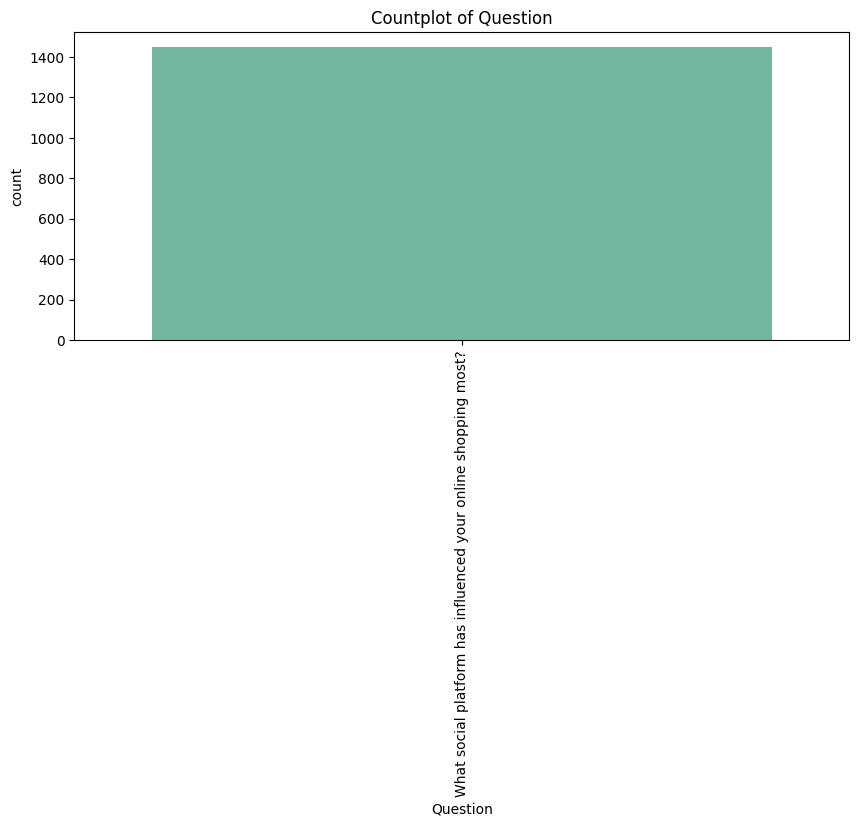

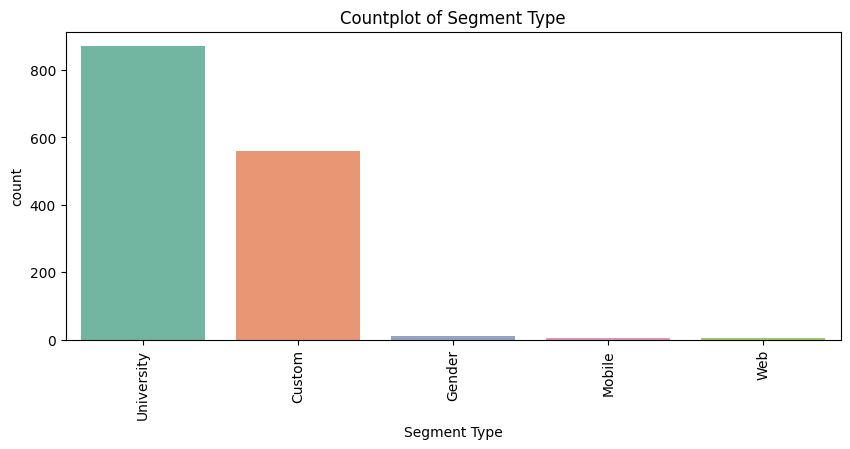

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128039 (\N{PENGUIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128421 (\N{DESKTOP COMPUTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128024 (\N{ELEPHANT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


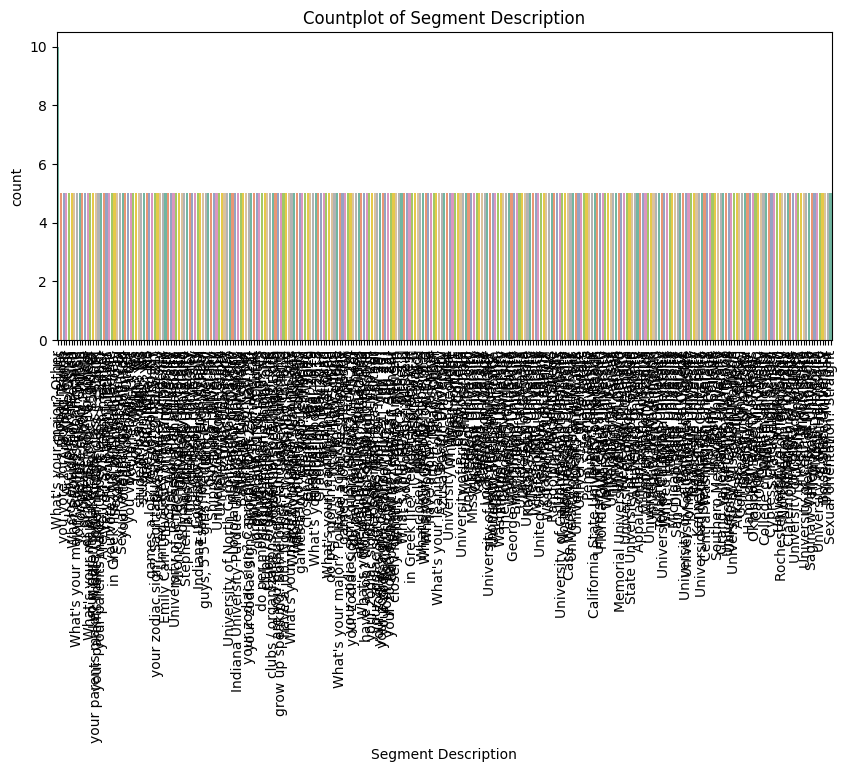

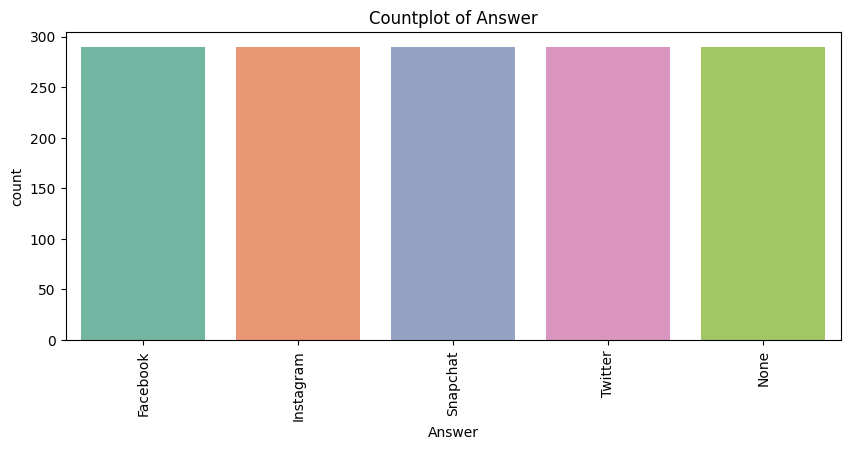

In [ ]:
# Visualize categorical variables
import seaborn as sns
import matplotlib.pyplot as plt
categorical_columns = ["Question", "Segment Type", "Segment Description", "Answer"]
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=column, palette="Set2", order = data[column].value_counts().index)
    plt.title(f"Countplot of {column}")
    plt.xticks(rotation=90)
    plt.show()

<ipython-input-11-8b12436f928c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


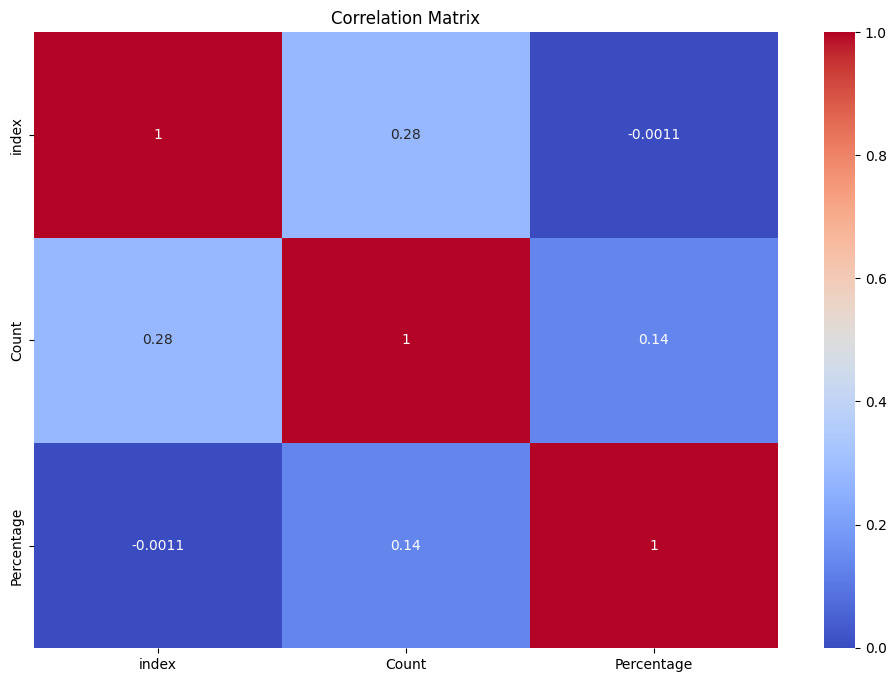

In [ ]:
# Calculate and visualize correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
STATISTICAL HYPOTHESIS TESTING

In [ ]:
import scipy.stats as stats

alpha = 0.05

# Create a contingency table for the chi-squared test
contingency_table = pd.crosstab(data['Answer'], data['Segment Type'])

# Perform the chi-squared test
chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

In [ ]:
# Print the results
print("Chi-Squared Statistic:", chi2_stat)
print("P-value:", p_val)

Chi-Squared Statistic: 0.0
P-value: 1.0


In [ ]:
# Check if the p-value is less than alpha to determine statistical significance
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference in response rates among segments based on the social platform.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in response rates among segments based on the social platform.")

Fail to reject the null hypothesis. There is no significant difference in response rates among segments based on the social platform.


In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Define your target variable (e.g., "Count" or "Percentage")
target_variable = "Count"  # Change to "Percentage"

In [ ]:
# Define the features and target variable
X = df.drop(target_variable, axis=1)
y = df[target_variable]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize and train Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Initialize and train Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Initialize and train Support Vector Regression model
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [ ]:
# Neural Networks (Multi-layer Perceptron Regressor)
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [ ]:
# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
# CatBoost Regressor
cb_model = CatBoostRegressor(random_state=42, verbose=0)
cb_model.fit(X_train, y_train)

In [ ]:
# Evaluate models on the test set
models = {
    "Random Forest Regression": rf_model,
    "Gradient Boosting Regression": gb_model,
    "Support Vector Regression": svr_model,
    "XGBoost Regression": xgb_model,
    "Neural Network Regression": nn_model,
    "CatBoost Regression": cb_model,
}

results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse

# Print the results
for model_name, mse in results.items():
    print(f"{model_name}: Mean Squared Error = {mse}")

Random Forest Regression: Mean Squared Error = 0.0011848924375970418
Gradient Boosting Regression: Mean Squared Error = 0.0017341808947758735
Support Vector Regression: Mean Squared Error = 0.006315432314021447
XGBoost Regression: Mean Squared Error = 0.0013499521054044514
Neural Network Regression: Mean Squared Error = 0.016551048826221305
CatBoost Regression: Mean Squared Error = 0.0006854514546430535


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for each model
param_grids= {
    "Random Forest Regression": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Gradient Boosting Regression": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 3, 4],
        'min_samples_leaf': [1, 2, 3]
    },
    "Support Vector Regression": {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.2]
    },
    "XGBoost Regression": {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'min_child_weight': [1, 2, 3]
    },
    "Neural Network Regression": {
        'hidden_layer_sizes': [(100,), (100, 50), (200, 100, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
    },
    "CatBoost Regression": {
        'iterations': [100, 200, 300],
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.1, 0.2],
    }
}


In [ ]:
# Initialize Grid Search with cross-validation for each model
grid_search_results = {}

for model_name, model in models.items():
    param_grid= param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    grid_search_results[model_name] = grid_search

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
# Get the best models after hyperparameter tuning
best_models = {model_name: grid_search.best_estimator_ for model_name, grid_search in grid_search_results.items()}

In [ ]:
# Evaluate the best models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} Best Model RMSE: {np.sqrt(mse)}")

Random Forest Regression Best Model RMSE: 0.0342125918993301
Gradient Boosting Regression Best Model RMSE: 0.035053932089541155
Support Vector Regression Best Model RMSE: 0.04647757958063347
XGBoost Regression Best Model RMSE: 0.03594727020810719
Neural Network Regression Best Model RMSE: 0.05292682802019612
CatBoost Regression Best Model RMSE: 0.025717938088338364


In [ ]:
# Print the best hyperparameters for each model
for model_name, grid_search in grid_search_results.items():
    print(f"{model_name} Best Hyperparameters: {grid_search.best_params_}")

Random Forest Regression Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Gradient Boosting Regression Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Support Vector Regression Best Hyperparameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
XGBoost Regression Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 300}
Neural Network Regression Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (200, 100, 50)}
CatBoost Regression Best Hyperparameters: {'depth': 6, 'iterations': 300, 'learning_rate': 0.2}


In [ ]:
# Initialize dictionaries to store evaluation metrics
mse_scores = {}
rmse_scores = {}
mae_scores = {}
r2_scores = {}

# Loop through each model and calculate metrics
for model_name, model in models.items():
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse

    # Calculate RMSE
    rmse = np.sqrt(mse)
    rmse_scores[model_name] = rmse

    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores[model_name] = mae

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores[model_name] = r2

# Print the results
for model_name in models.keys():
    print(f"{model_name}:")
    print(f"Mean Squared Error (MSE): {mse_scores[model_name]}")
    print(f"Root Mean Squared Error (RMSE): {rmse_scores[model_name]}")
    print(f"Mean Absolute Error (MAE): {mae_scores[model_name]}")
    print(f"R-squared (R2) Score: {r2_scores[model_name]}")
    print("=" * 50)
    print()

Random Forest Regression:
Mean Squared Error (MSE): 0.0011848924375970418
Root Mean Squared Error (RMSE): 0.034422266595868466
Mean Absolute Error (MAE): 0.012812875505225207
R-squared (R2) Score: 0.8455632245283595

Gradient Boosting Regression:
Mean Squared Error (MSE): 0.0017341808947758735
Root Mean Squared Error (RMSE): 0.04164349762899213
Mean Absolute Error (MAE): 0.017591917128865122
R-squared (R2) Score: 0.7739699427765351

Support Vector Regression:
Mean Squared Error (MSE): 0.006315432314021447
Root Mean Squared Error (RMSE): 0.07946969431186612
Mean Absolute Error (MAE): 0.0655266102829181
R-squared (R2) Score: 0.17685777093417043

XGBoost Regression:
Mean Squared Error (MSE): 0.0013499521054044514
Root Mean Squared Error (RMSE): 0.03674169437307501
Mean Absolute Error (MAE): 0.014180652719350446
R-squared (R2) Score: 0.8240496406385909

Neural Network Regression:
Mean Squared Error (MSE): 0.016551048826221305
Root Mean Squared Error (RMSE): 0.12865087961697466
Mean Absolut

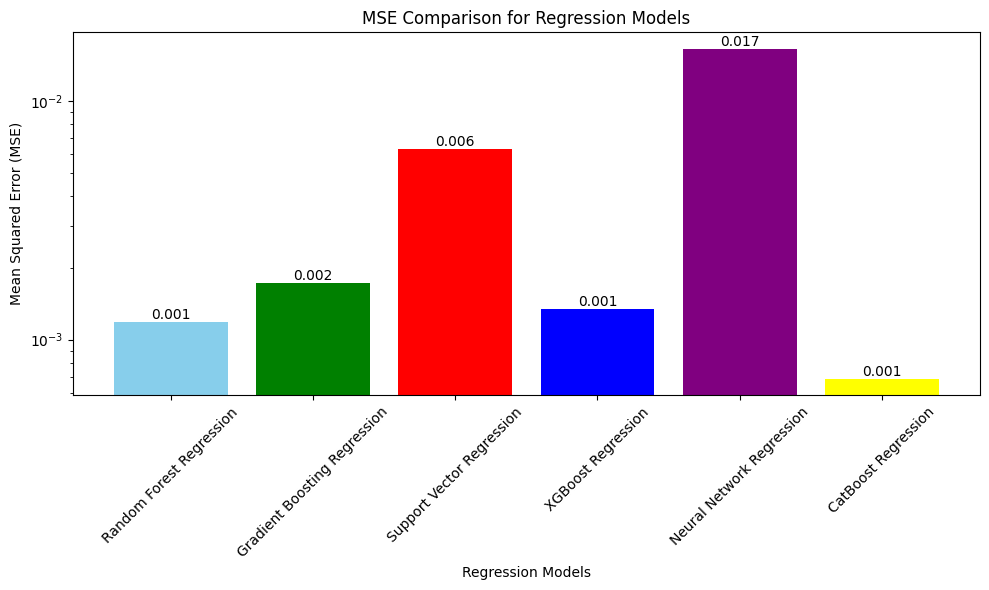

In [ ]:
import matplotlib.pyplot as plt

# Your code for evaluating models and storing results

# Extract model names and MSE values
model_names = list(results.keys())
mse_values = list(results.values())

# Define a list of colors for each model
colors = ['skyblue', 'green', 'red', 'blue','purple','yellow']

# Create a bar chart with custom colors and a logarithmic y-axis scale
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mse_values, color=colors)
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison for Regression Models')
plt.xticks(rotation=45)  # Rotate the model names for better visibility
plt.yscale('log')  # Use a logarithmic scale for the y-axis

# Add model names as labels above the bars
for bar, mse in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, mse, f'{mse:.3f}', ha='center', va='bottom')

# Display the bar chart
plt.tight_layout()
plt.show()



In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.8 MB/s eta 0:00:00


In [ ]:
from tqdm import tqdm  # Import tqdm from tqdm package

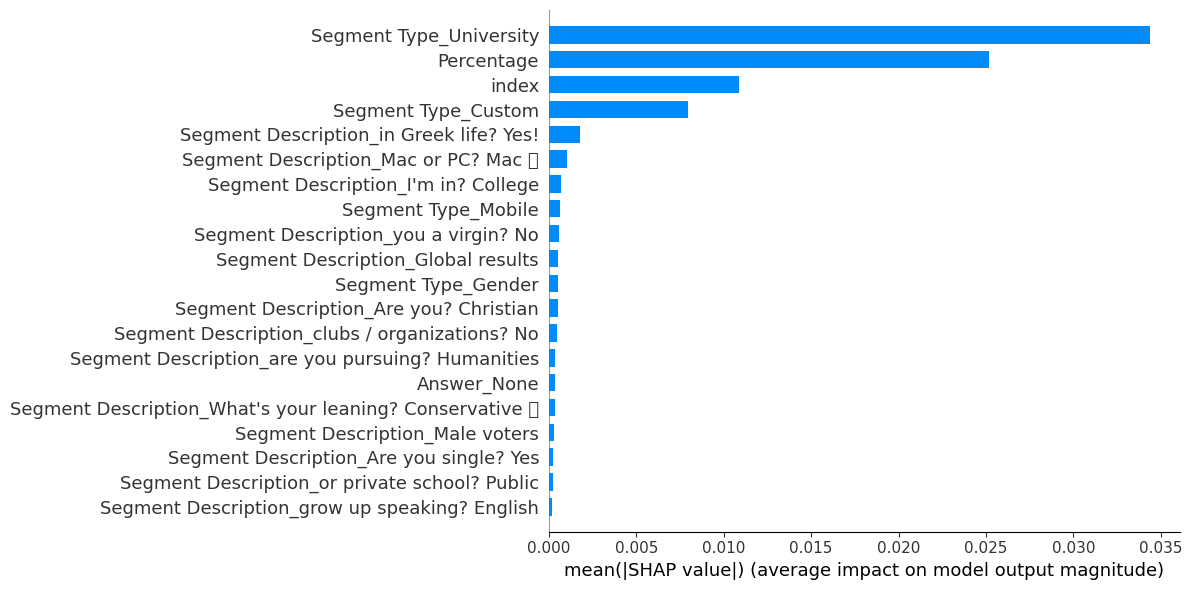

In [ ]:
import shap




cb_model = CatBoostRegressor(random_state=42, verbose=0)
cb_model.fit(X_train, y_train)


# Initialize the SHAP explainer with the trained model
explainer = shap.Explainer(model, X_train)
#X_test = X_test.drop(['Percentage', 'index'], axis=1)
# Calculate SHAP values for the testing data
shap_values = explainer.shap_values(X_test, check_additivity=False)  # Disable additivity check

# Visualize feature importances using a summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(12, 6), color_bar_label='Feature Importance', show=False)


In [ ]:
# Visualize individual predictions and their explanations (replace 0 with the desired example index)
example_index = 0  # Change this index to visualize a different example
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[example_index], X_test.iloc[example_index, :])


In [ ]:
# Feature importance analysis
importances = rf_model.feature_importances_
feature_names = X.columns
importance_series = pd.Series(importances, index=feature_names)
# Print the feature importance analysis
print(importance_series.nlargest(10).iloc[2:])

Segment Type_University                            0.149172
Segment Description_I'm in? College                0.078829
Segment Description_Global results                 0.037217
Segment Description_What's your GPA? 3.0 to 4.0    0.032564
Segment Description_student loan debt? No          0.029258
Segment Type_Mobile                                0.028958
Segment Description_clubs / organizations? No      0.024070
Segment Description_you a virgin? No               0.021897
dtype: float64


In [ ]:
import numpy as np
import pandas as pd

# Calculate the absolute mean SHAP values for each feature
mean_absolute_shap_values = np.mean(np.abs(shap_values), axis=0)

# Sort the features by their mean absolute SHAP values in descending order
sorted_indices = np.argsort(mean_absolute_shap_values)[::-1]

# Get the names of the top 10 features
top_10_feature_names = X.columns[sorted_indices[:10]]

# Get the mean absolute SHAP values of the top 10 features
top_10_shap_values = mean_absolute_shap_values[sorted_indices[:10]]

# Print the top 10 feature names and their mean absolute SHAP values
for feature_name, shap_value in zip(top_10_feature_names, top_10_shap_values):
    print(f"Feature: {feature_name}, Mean Absolute SHAP Value: {shap_value}")

Feature: Segment Type_University, Mean Absolute SHAP Value: 0.034373074491133276
Feature: Percentage, Mean Absolute SHAP Value: 0.025160404479271613
Feature: index, Mean Absolute SHAP Value: 0.01087893048711701
Feature: Segment Type_Custom, Mean Absolute SHAP Value: 0.007984050206022896
Feature: Segment Description_in Greek life? Yes!, Mean Absolute SHAP Value: 0.0017887728503185295
Feature: Segment Description_Mac or PC? Mac 🖥, Mean Absolute SHAP Value: 0.0010340819937261808
Feature: Segment Description_I'm in? College, Mean Absolute SHAP Value: 0.0006863392529773811
Feature: Segment Type_Mobile, Mean Absolute SHAP Value: 0.0006136026494356167
Feature: Segment Description_you a virgin? No, Mean Absolute SHAP Value: 0.0005848104781612948
Feature: Segment Description_Global results, Mean Absolute SHAP Value: 0.0005270114976613292


Glyph 128039 (\N{PENGUIN}) missing from current font.
Glyph 128024 (\N{ELEPHANT}) missing from current font.
Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from current font.
Glyph 128039 (\N{PENGUIN}) missing from current font.
Glyph 128024 (\N{ELEPHANT}) missing from current font.
Glyph 128311 (\N{LARGE BLUE DIAMOND}) missing from current font.


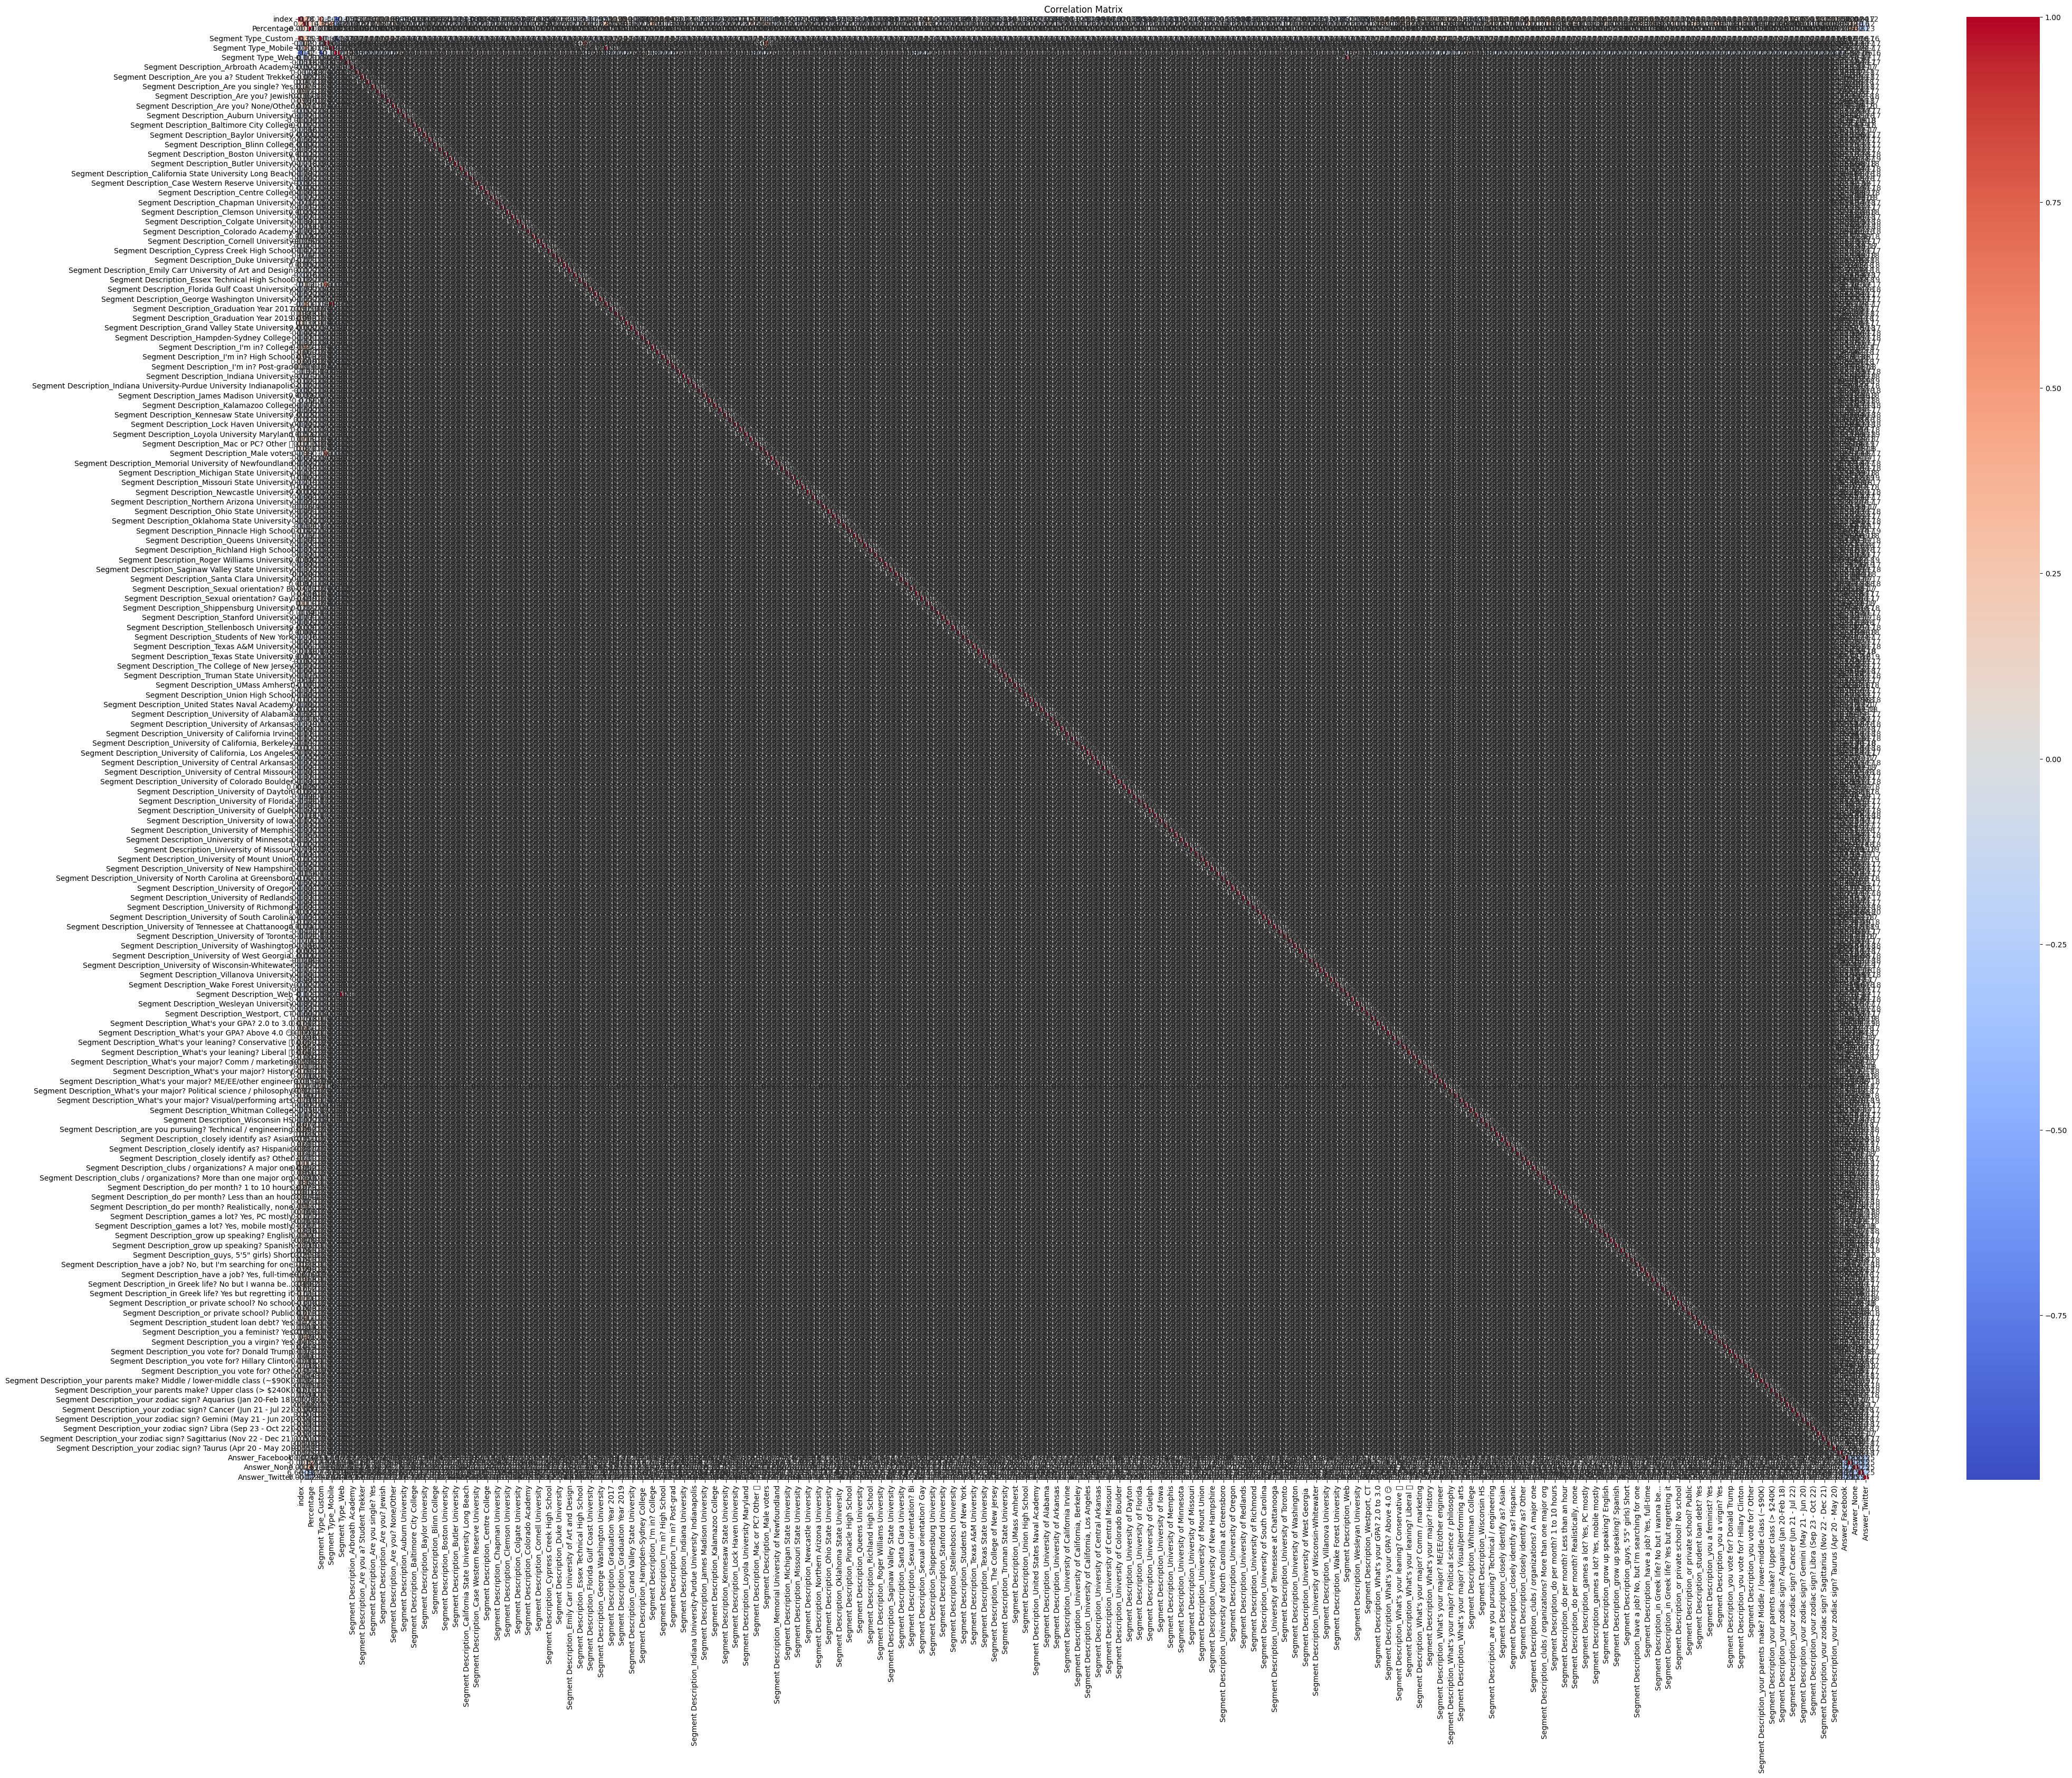

In [ ]:
# Calculate and visualize correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(48, 36))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()